<a href="https://colab.research.google.com/github/linejin/ai_study/blob/master/Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title hidden setting code {display-mode: "form"}

#@markdown 이 부분을 실행시켜주세요{display-mode: "form"}

# This document is made by Choi Sejin



# This code will be hidden when the notebook is loaded.
!pip install --upgrade -q gspread


# using for google sheet
"""
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

# Open our new sheet and read some data.
worksheet = gc.open('A new spreadsheet').sheet1

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
print(rows)

# Convert to a DataFrame and render.
import pandas as pd
pd.DataFrame.from_records(rows)
"""
!git clone https://github.com/linejin/ai_study
print("Cloneing Ready")

참고자료  
PyTorch로 시자가는 딥 러닝 입문  
https://wikidocs.net/57805

Logistic Regression 강의 영상 https://www.youtube.com/watch?v=zASrGSHoqL4&t=129s&ab_channel=MinsukHeo%ED%97%88%EB%AF%BC%EC%84%9D

#Logistic regression

2가지 상태를 판별하는데 사용하는 방법


예시)  
- 점수가 있을 때, 합격인가 불합격인가  
- 환자의 상태가 주어질 때, 특정 질병 판별  
- 종양이 악성인가 아닌가
- 대출을 받을 때, 대출이 가능한가에 대한 판별  
- 날씨 정보가 주어졌을 때, 비가 올것인가에 대한 판별  
- 이메일이 스팸인지 판별  
- 마케팅에서 특정 유져가 특정 광고에 관심을 갖을 것인지 판별

##What is diffrent between Linear regression and Logistic regression

아래 그래프는 점수를 기준으로 합격 불합격이 나눠지는 문제에 대한 Linear regression 결과이다.

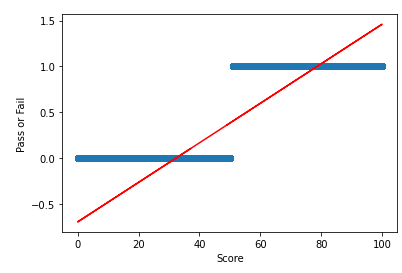

Linear regression에 따르면 점수가 높으면 높을 수록 합격이 많다. 라는 결론을 내릴 순 있다.  
하지만 점수에 따른 합격여부 혹은 합격 확률을 구하긴 어렵다.  

선형만으론 확률을 구하기 어려우니 선형방정식을 **구부려** 정규분포누적 함수와 유사하게 만드는 것이 **Logistic Regression**이다.

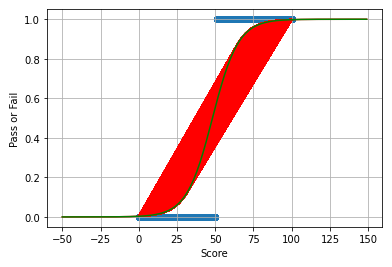

##### 정규분포 밀도 함수 그래프

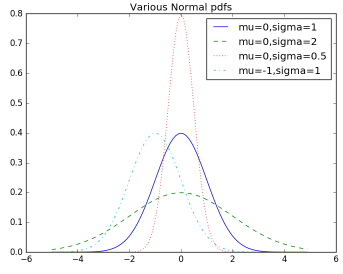

##### 정규분포누적함수 그래프

정규분포 밀도 함수를 누적(적분)하여 그래프를 그려보면 아래와 같아진다.

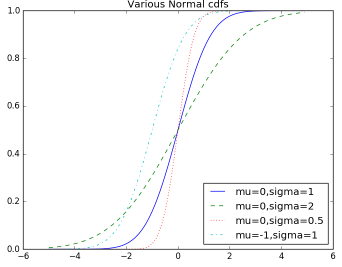

Logistic Regression의 H(x)는 아래와 같다.

$sigmoid = H(x) = \frac{1}{1 + e^{-(Wx + b)}}$

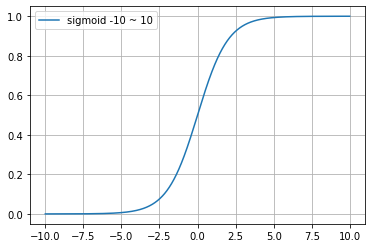

In [ ]:
#@title sigmoid Graph {display-mode: "form"}

#@markdown 이 부분을 실행시켜주세요{display-mode: "form"}
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.01)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y, label='sigmoid -10 ~ 10')
plt.grid()
plt.legend()
plt.show()

##### sigmoid 식 유도 방법

앞에서 설명했듯이 선형방정식을 구부려 확률을 만들것이므로 이는 아래와 같은 말로 바꿀 수 있다.
 
>$Wx + b = 확률값 , range = (-\infty,\infty)$

확률값에 확률($Probability$)에 대입하여 비교해보면 아래와 같다.

>$Probability = \frac{Success}{Total} , range = (0 , 1)$ 
>$Wx + b = Probability = \frac{Success}{Total} , range = (0 , 1)$

여기서 선형방정식과 $Probability$의 $range$가 다르기에 서로 같다고 볼 수 없다.

이를 해결하기 위해 승산($Odds$)를 활용한다.

>$Odds = \frac{Success}{Fail}, range = (0, \infty)$

위 정의를 통해 $Odds$는 아래와 같이 구할 수 있다.

>$Odds = \frac{P(Y = 1)}{P(Y = 0)} = \frac{P(Y = 1)}{1 - P(Y = 1)},range = (0,\infty)$


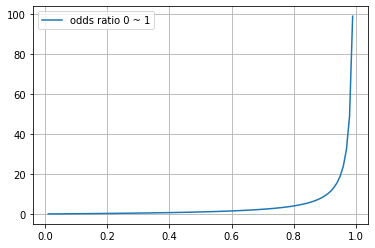

In [ ]:
#@title Odds Graph {display-mode: "form"}

#@markdown 이 부분을 실행시켜주세요{display-mode: "form"}
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.01, 1, 0.01)
y = x/(1-x)

plt.plot(x, y, label='odds ratio 0 ~ 1')
plt.grid()
plt.legend()
plt.show()


이렇게 구한 $Odds$를 확률값에 대입하여 비교해보면 아래와 같다.

>$Wx + b = Odds = \frac{P(Y = 1)}{1 - P(Y = 1)},range = (0,\infty)$

여전히 선형방정식과 $Odds$의 $range$가 일치하지 않는다. 하지만 $range$에서 $\infty$는 일치하기에 $0$을 $\infty$로 바꿔주기만 하면 해결이 가능하다.

이를 위하여 $Log$를 취해준다. (Log는 ($0,\infty$)의 범위를 ($-\infty,\infty$)로 바꿀 수 있다.)


>$Wx + b = ln(Odds) = ln(\frac{P(Y = 1)}{1 - P(Y = 1)}),range = (-\infty,\infty)$



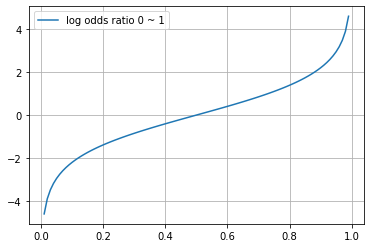

In [ ]:
#@title Log(odds) Graph {display-mode: "form"}

#@markdown 이 부분을 실행시켜주세요{display-mode: "form"}
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.01, 1, 0.01)
y = np.log(x/(1-x))

plt.plot(x, y, label='log odds ratio 0 ~ 1')
plt.grid()
plt.legend()
plt.show()

이를 P에 대하여 정리하면

>$\frac{P(Y = 1)}{1 - P(Y = 1)} = e^{Wx + b}$  
>$P(Y = 1) = e^{Wx + b} - e^{Wx + b}P(Y = 1)$  
>$P(Y = 1)(1 + e^{Wx + b}) = e^{Wx + b}$  
>$P(Y = 1) = \frac{e^{Wx + b}}{1 + e^{Wx + b}} = \frac{1}{1 + e^{-(Wx + b)}}$

으로

>$sigmoid = \frac{1}{1 + e^{-(Wx + b)}}$

의 식이 유도된다.

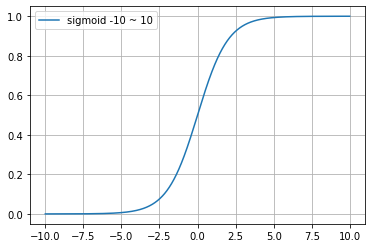

In [ ]:
#@title sigmoid Graph {display-mode: "form"}

#@markdown 이 부분을 실행시켜주세요{display-mode: "form"}
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-10, 10, 0.01)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y, label='sigmoid -10 ~ 10')
plt.grid()
plt.legend()
plt.show()

### 가설 수립

>$H(x) = \frac{1}{1 + e^{-(Wx + b)}}$

###비용 함수

$MAE$, $MSE$ 사용 가능  
   - 경사하강법의 속도 측면에서 한계가 있음  
   
$Binary Cross Entropy$를 주로 사용

####Binary Cross Entropy

$Odds$에는 이미 '얼마나 틀렸는가'와 '얼마나 맞췄는가'에 대한 정보가 모두 들어가있다.  
따라서 Label이 1이여야 하면 Label이 1일 확률을, Label이 0이면 Label이 0일 확률만을 사용할 수 있다.

$Odds$는 기본적으로 $(0,\infty)$의 범위에서 사용 가능하므로 $Log$를 사용해 $(-\infty, \infty)$의 범위로 바꿔준다.

이를 $Odds = F(x),label = L$이라고 하여 정리하면

>\begin{align}
cost(x)  &= 
\left[\begin{array}{rr}
{}-Log(F(x)) & L = 1\\
Log(1-F(x)) & L = 0 
\end{array}\right] \\
&= -(L)Log(F(x))-(1-L)Log(1-F(x))
\end{align}

가 된다.



###경사하강법

#### MSE

#####1. **계산상의 한계**



경사하강법에서는 기울기를 이용하여 최적의 값을 찾아간다.

먼저 $sigmoid$를 미분하면

>\begin{align}

sigmoid = F(x) &= \frac{1}{1 + e^{-x}}\\
\frac{d}{dx} F(x) &= \frac{d}{dx}(1\frac{1}{1 + e^{-x}}) \\
&=\frac{d}{dx}(1 + e^{-x})^{-1} \\
&=-(1+e^{-x})^{-2}\frac{d}{dx}(1 + e^{-x})\\
&=-(1+e^{-x})^{-2}(-e^{-x}) \\
&=\frac{e^{-x}}{(1+e^{-x})^{2}} \\
&=\frac{1}{(1+e^{-x})}*\frac{e^{-x}}{(1+e^{-x})} \\
&=\frac{1}{(1+e^{-x})}*(1 - \frac{1}{(1+e^{-x}))}\\
&=F(x)*(1-F(x))

\end{align}



$MSE$를 활용하여 기울기를 찾는다면

> $W_{i+1} := W_{i} - \alpha\frac{\partial}{\partial W}MSE$  

을따라 $MSE$를 미분해야 하며,

MSE는
>$ MSE = \sqrt{(Y - \frac{1}{1 + e^{-(Wx + b)}})^2}$

로 앞에서 구한 $\frac{d}{dx}sigmoid$의 식이 상당히 복잡하게 나온다.

#####2. **경사하강법 상의 한계**


각 $W$에 대하여 $MSE$를 계산한 그래프는 아래와 같이 나온다.

특정 $W$에서 오히려 $cost$가 작아지는 방향이 아닌 커지는 지점으로 이동해야 전체에서 제일 작은 $cost$지점을 찾을 수 있는 경우가 생긴다.

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


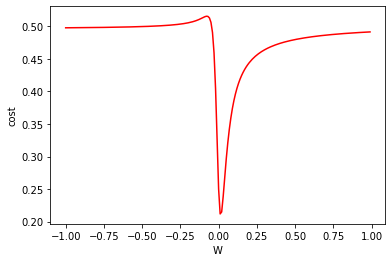

In [ ]:
#@title MSE cost Graph by W {display-mode: "form"}

#@markdown 코드 {display-mode: "form"}
import torch
N = 100000
X_train = (torch.rand(N, 1) * 100).round()
X_test = (torch.rand(N, 1) * 100).round()
Y_train = (X_train / 100).round()
Y_test = (X_test / 100).round()

W_list = []
cost_list = []
for W in np.arange(-1, 1, 0.01):

    hypothesis = F.sigmoid(W*X_train)
    cost = torch.mean((hypothesis - Y_train)**2)

    W_list.append(W)
    cost_list.append(cost.item())
    
plt.plot(W_list, cost_list, 'r')
plt.xlabel('W')
plt.ylabel('cost')
plt.show()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


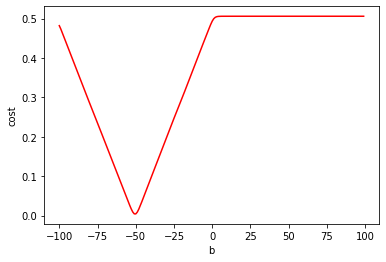

In [ ]:
#@title MSE cost Graph by b {display-mode: "form"}

#@markdown 코드 {display-mode: "form"}
import torch
N = 100000
X_train = (torch.rand(N, 1) * 100).round()
X_test = (torch.rand(N, 1) * 100).round()
Y_train = (X_train / 100).round()
Y_test = (X_test / 100).round()

B_list = []
cost_list = []
for B in np.arange(-100, 100, 1):

    hypothesis = F.sigmoid(X_train+B)
    cost = torch.mean((hypothesis - Y_train)**2)

    B_list.append(B)
    cost_list.append(cost.item())
    
plt.plot(B_list, cost_list, 'r')
plt.xlabel('b')
plt.ylabel('cost')
plt.show()

####Binary Cross Entopy

#####1. **BCE의 미분 계산**



>\begin{align}

W_{i+1} &:= W_{i} - \alpha\frac{\partial}{\partial W}BCE\\
b_{i+1} &:= b_i - \alpha\frac{\partial}{\partial W}BCE
\end{align}

BCE의 미분 : 

>\begin{align}

\frac{d}{dY}BCE&=\frac{d}{dY}(-(L)Log(Y)-(1-L)Log(1-Y)) \\
&=\frac{d}{dY}(-(L)Log(Y)) - \frac{d}{dY}((1-L)Log(1-Y)) \\
&=\frac{-L}{Y}+\frac{1-L}{1-Y}

\end{align}

MSE에 비하여 기울기(미분)식이 훨씬 간결해 진다.

#####2. **BCE의 Cost Graph**

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


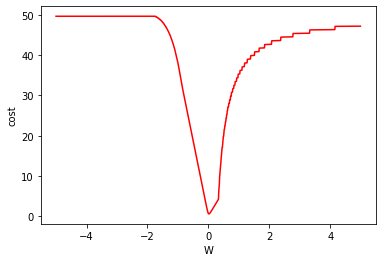

In [ ]:
#@title BCE cost Graph by W {display-mode: "form"}

#@markdown 코드 {display-mode: "form"}
import torch
N = 100000
X_train = (torch.rand(N, 1) * 100).round()
X_test = (torch.rand(N, 1) * 100).round()
Y_train = (X_train / 100).round()
Y_test = (X_test / 100).round()

W_list = []
cost_list = []
for W in np.arange(-5, 5, 0.01):

    hypothesis = F.sigmoid(W*X_train)
    cost = F.binary_cross_entropy(hypothesis, Y_train)

    W_list.append(W)
    cost_list.append(cost.item())
    
plt.plot(W_list, cost_list, 'r')
plt.xlabel('W')
plt.ylabel('cost')
plt.show()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1639: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


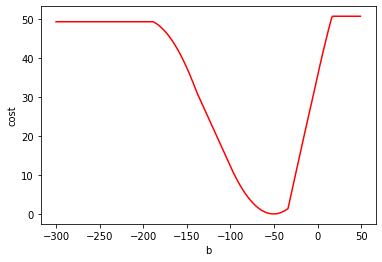

In [ ]:
#@title MSE cost Graph by b {display-mode: "form"}

#@markdown 코드 {display-mode: "form"}
import torch
N = 100000
X_train = (torch.rand(N, 1) * 100).round()
X_test = (torch.rand(N, 1) * 100).round()
Y_train = (X_train / 100).round()
Y_test = (X_test / 100).round()

B_list = []
cost_list = []
for B in np.arange(-300, 50, 1):

    hypothesis = F.sigmoid(X_train+B)
    cost = F.binary_cross_entropy(hypothesis, Y_train)

    B_list.append(B)
    cost_list.append(cost.item())
    
plt.plot(B_list, cost_list, 'r')
plt.xlabel('b')
plt.ylabel('cost')
plt.show()

### Local Minimum 문제

$Local Minimum$이란 아래의 그림과 같이 cost Graph가 울퉁불퉁한 경우에 전체의 가장 작은 cost($Global Minimum$)이 아닌 다른 부분의 작은 cost를 의미한다.

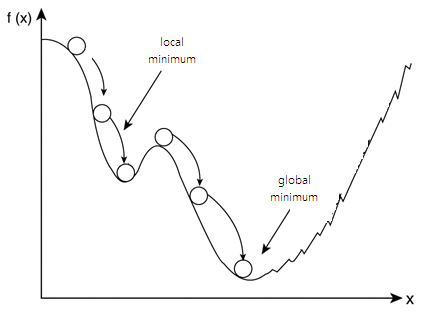

####Local Minimum을 해결하는 방법 (Momentum)

일종의 관성을 주어 $Local Minimum$을 벗어나는 방법이 $momentum$이다.



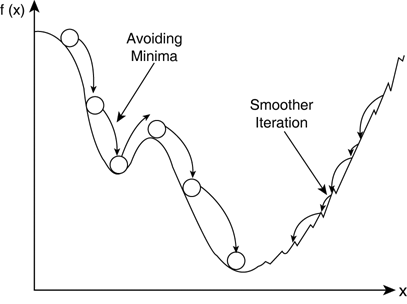

#Logistic Regression Practice

##코드 기능별

### DATA 생성(공통 코드)

* input data(점수) : 
0 ~ 100 사이의 무작위 숫자 N개 생성

* output data(합격여부) :
input data가 50이상이면 참(합격), 미만이면 거짓(불합격)

In [1]:
import torch

#DATA개수
N = 100000

#input 생성
X_train = (torch.rand(N, 1) * 100).round()
X_test = (torch.rand(N, 1) * 100).round()

#output 생성
Y_train = (X_train / 100).round()
Y_test = (X_test / 100).round()

#input과 output 확인
print(X_train)
print(Y_train)

tensor([[30.],
        [63.],
        [81.],
        ...,
        [ 2.],
        [42.],
        [90.]])
tensor([[0.],
        [1.],
        [1.],
        ...,
        [0.],
        [0.],
        [1.]])


### import(공통 코드)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

### model 생성

Linear에 sigmoid를 붙인 형태

In [3]:
class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        y = self.linear(x)
        z = self.sigmoid(y)
        return z
        
model = LogisticRegression()

### optimizer 생성

아래 두개중 선택

#####non momentum optimizer

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.0001)

#####momentum = 0.9 optimizer

In [4]:
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum = 0.9)

###학습 (BCE 사용)

In [5]:
nb_epochs = 10000
for epoch in range(nb_epochs + 1):

    hypothesis = model(X_train)

    cost = F.binary_cross_entropy(hypothesis, Y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

### 결과 출력

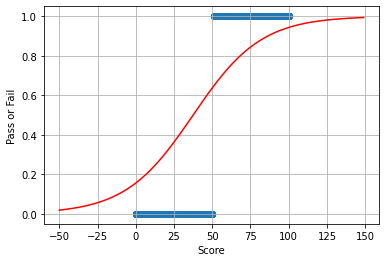

In [6]:
plt.scatter(X_test, Y_test)
# X * W + d 의 그래프화
plt.plot(range(-50,150), model(torch.Tensor(range(-50,150)).reshape(200,1)).detach().numpy(), 'r')
plt.xlabel('Score')
plt.ylabel('Pass or Fail')
plt.grid()
plt.show()

##전체 코드

###Cost : BCE, Optimizer : lr=0.0001 momentum = 0.9

각 방식에 따라 수정할 부분을 주석에 ----로 표기

Epoch    0/200000 Cost: 21.315775 Accuracy 50.09%
Epoch 1000/200000 Cost: 14.024758 Accuracy 50.09%
Epoch 2000/200000 Cost: 0.619938 Accuracy 49.40%
Epoch 3000/200000 Cost: 0.615978 Accuracy 49.40%
Epoch 4000/200000 Cost: 0.612062 Accuracy 49.40%
Epoch 5000/200000 Cost: 0.608192 Accuracy 49.40%
Epoch 6000/200000 Cost: 0.604366 Accuracy 49.40%
Epoch 7000/200000 Cost: 0.600583 Accuracy 49.40%
Epoch 8000/200000 Cost: 0.596845 Accuracy 49.91%
Epoch 9000/200000 Cost: 0.593148 Accuracy 50.89%
Epoch 10000/200000 Cost: 0.589495 Accuracy 51.87%
Epoch 11000/200000 Cost: 0.585883 Accuracy 52.87%
Epoch 12000/200000 Cost: 0.582313 Accuracy 53.89%
Epoch 13000/200000 Cost: 0.578784 Accuracy 54.93%
Epoch 14000/200000 Cost: 0.575295 Accuracy 55.96%
Epoch 15000/200000 Cost: 0.571847 Accuracy 56.93%
Epoch 16000/200000 Cost: 0.568438 Accuracy 57.92%
Epoch 17000/200000 Cost: 0.565069 Accuracy 57.92%
Epoch 18000/200000 Cost: 0.561738 Accuracy 58.99%
Epoch 19000/200000 Cost: 0.558445 Accuracy 59.97%
Epoch 20

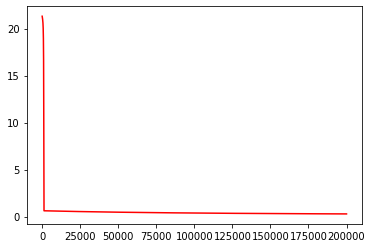

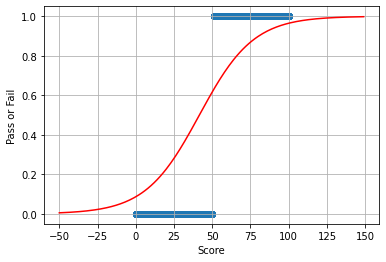

In [ ]:
import torch

N = 100000

X_train = (torch.rand(N, 1) * 100).round()
X_test = (torch.rand(N, 1) * 100).round()


Y_train = (X_train / 100).round()
Y_test = (X_test / 100).round()

import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

epoch_list = []
cost_list = []
W_list = []
b_list = []

class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1) # Linear 형태 정의-----------------------
        self.sigmoid = nn.Sigmoid() # Logistic 형태 정의-----------------------

    def forward(self, x):
        y = self.linear(x) # Linear 사용---------------------------------------
        z = self.sigmoid(y) # Logistic 사용------------------------------------
        return z
        
model = LogisticRegression()

#optimizer 옵션 적용시 수정할 부분----------------------------------------------
optimizer = optim.SGD(model.parameters(), lr=0.0001)

nb_epochs = 200000
for epoch in range(nb_epochs + 1):

    hypothesis = model(X_train)

    cost = F.binary_cross_entropy(hypothesis, Y_train) # Cost 계산 방식 설정 ---

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 진행 상황 출력
    if epoch % 1000 == 0:
        result = list(model.parameters())
        """print(
            'Epoch : {:4d}/{} W : {:.4f} d : {:.4f} Cost : {:.6f}' .format(
                epoch, nb_epochs, result[0].item(), result[1].item(), cost.item()
                ))"""
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == Y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))
    # 각 epoch마다 cost 기록
    epoch_list.append(epoch)
    cost_list.append(cost.item())
    W_list.append(result[0].item())
    b_list.append(result[1].item())

# epoch당 cost 출력
plt.plot(epoch_list, cost_list, color = 'r')
plt.show()

# model 의 그래프화
plt.scatter(X_test, Y_test)
plt.plot(range(-50,150), model(torch.Tensor(range(-50,150)).reshape(200,1)).detach().numpy(), 'r')
plt.xlabel('Score')
plt.ylabel('Pass or Fail')
plt.grid()
plt.show()

### Cost : BCE, Optimizer : lr=0.0001 momentum = none

Epoch    0/200000 Cost: 5.464653 Accuracy 47.11%
Epoch 1000/200000 Cost: 0.687347 Accuracy 49.37%
Epoch 2000/200000 Cost: 0.682625 Accuracy 49.37%
Epoch 3000/200000 Cost: 0.677954 Accuracy 49.37%
Epoch 4000/200000 Cost: 0.673336 Accuracy 49.37%
Epoch 5000/200000 Cost: 0.668768 Accuracy 49.37%
Epoch 6000/200000 Cost: 0.664252 Accuracy 49.37%
Epoch 7000/200000 Cost: 0.659786 Accuracy 49.37%
Epoch 8000/200000 Cost: 0.655370 Accuracy 49.37%
Epoch 9000/200000 Cost: 0.651004 Accuracy 49.37%
Epoch 10000/200000 Cost: 0.646687 Accuracy 49.37%
Epoch 11000/200000 Cost: 0.642419 Accuracy 49.37%
Epoch 12000/200000 Cost: 0.638199 Accuracy 49.37%
Epoch 13000/200000 Cost: 0.634026 Accuracy 49.37%
Epoch 14000/200000 Cost: 0.629901 Accuracy 49.37%
Epoch 15000/200000 Cost: 0.625823 Accuracy 49.37%
Epoch 16000/200000 Cost: 0.621792 Accuracy 49.37%
Epoch 17000/200000 Cost: 0.617806 Accuracy 49.37%
Epoch 18000/200000 Cost: 0.613866 Accuracy 49.37%
Epoch 19000/200000 Cost: 0.609971 Accuracy 49.37%
Epoch 2000

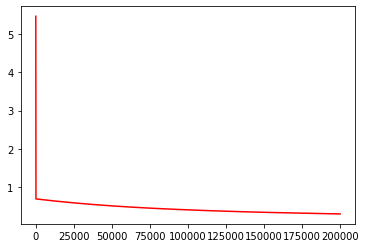

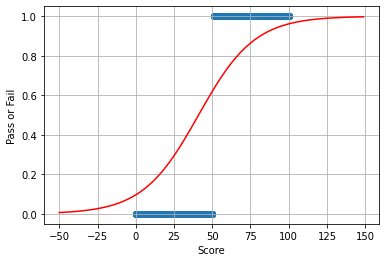

In [ ]:
import torch

N = 100000

X_train = (torch.rand(N, 1) * 100).round()
X_test = (torch.rand(N, 1) * 100).round()


Y_train = (X_train / 100).round()
Y_test = (X_test / 100).round()

import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

epoch_list = []
cost_list = []

class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        y = self.linear(x)
        z = self.sigmoid(y)
        return z
        
model = LogisticRegression()

optimizer = optim.SGD(model.parameters(), lr=0.0001)

nb_epochs = 200000
for epoch in range(nb_epochs + 1):

    hypothesis = model(X_train)

    cost = F.binary_cross_entropy(hypothesis, Y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 진행 상황 출력
    if epoch % 1000 == 0:
        result = list(model.parameters())
        """print(
            'Epoch : {:4d}/{} W : {:.4f} d : {:.4f} Cost : {:.6f}' .format(
                epoch, nb_epochs, result[0].item(), result[1].item(), cost.item()
                ))"""
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == Y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))
    # 각 epoch마다 cost 기록
    epoch_list.append(epoch)
    cost_list.append(cost.item())

# epoch당 cost 출력
plt.plot(epoch_list, cost_list, color = 'r')
plt.show()

# model 의 그래프화
plt.scatter(X_test, Y_test)
plt.plot(range(-50,150), model(torch.Tensor(range(-50,150)).reshape(200,1)).detach().numpy(), 'r')
plt.xlabel('Score')
plt.ylabel('Pass or Fail')
plt.grid()
plt.show()

###Cost : MAE, Optimizer : lr=0.0001 momentum = none

Epoch    0/200000 Cost: 0.497151 Accuracy 49.42%
Epoch 1000/200000 Cost: 0.496690 Accuracy 49.42%
Epoch 2000/200000 Cost: 0.496124 Accuracy 49.42%
Epoch 3000/200000 Cost: 0.495400 Accuracy 49.42%
Epoch 4000/200000 Cost: 0.494422 Accuracy 49.42%
Epoch 5000/200000 Cost: 0.492972 Accuracy 49.42%
Epoch 6000/200000 Cost: 0.490400 Accuracy 49.42%
Epoch 7000/200000 Cost: 0.482633 Accuracy 49.42%
Epoch 8000/200000 Cost: 0.431841 Accuracy 49.42%
Epoch 9000/200000 Cost: 0.428891 Accuracy 49.42%
Epoch 10000/200000 Cost: 0.425791 Accuracy 49.42%
Epoch 11000/200000 Cost: 0.422536 Accuracy 49.42%
Epoch 12000/200000 Cost: 0.419120 Accuracy 49.42%
Epoch 13000/200000 Cost: 0.415542 Accuracy 49.42%
Epoch 14000/200000 Cost: 0.411798 Accuracy 49.42%
Epoch 15000/200000 Cost: 0.407889 Accuracy 49.42%
Epoch 16000/200000 Cost: 0.403813 Accuracy 49.42%
Epoch 17000/200000 Cost: 0.399573 Accuracy 49.42%
Epoch 18000/200000 Cost: 0.395173 Accuracy 49.42%
Epoch 19000/200000 Cost: 0.390618 Accuracy 49.42%
Epoch 2000

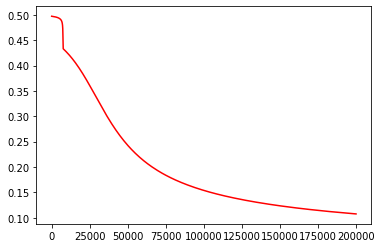

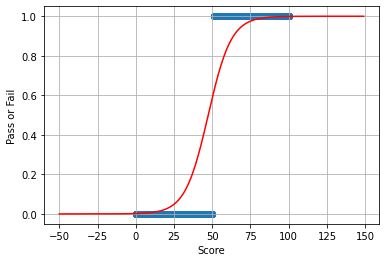

In [ ]:
import torch

N = 100000

X_train = (torch.rand(N, 1) * 100).round()
X_test = (torch.rand(N, 1) * 100).round()


Y_train = (X_train / 100).round()
Y_test = (X_test / 100).round()

import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

epoch_list = []
cost_list = []

class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        y = self.linear(x)
        z = self.sigmoid(y)
        return z
        
model = LogisticRegression()

optimizer = optim.SGD(model.parameters(), lr=0.001)

nb_epochs = 200000
for epoch in range(nb_epochs + 1):

    hypothesis = model(X_train)

    cost = torch.mean(abs(hypothesis - Y_train))

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 진행 상황 출력
    if epoch % 1000 == 0:
        result = list(model.parameters())
        """print(
            'Epoch : {:4d}/{} W : {:.4f} d : {:.4f} Cost : {:.6f}' .format(
                epoch, nb_epochs, result[0].item(), result[1].item(), cost.item()
                ))"""
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == Y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))
    # 각 epoch마다 cost 기록
    epoch_list.append(epoch)
    cost_list.append(cost.item())

# epoch당 cost 출력
plt.plot(epoch_list, cost_list, color = 'r')
plt.show()

# model 의 그래프화
plt.scatter(X_test, Y_test)
plt.plot(range(-50,150), model(torch.Tensor(range(-50,150)).reshape(200,1)).detach().numpy(), 'r')
plt.xlabel('Score')
plt.ylabel('Pass or Fail')
plt.grid()
plt.show()

In [7]:
import torch

N = 100000

X_train = (torch.rand(N, 1) * 100).round()
X_test = (torch.rand(N, 1) * 100).round()


Y_train = (X_train / 100).round()
Y_test = (X_test / 100).round()

import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 

epoch_list = []
cost_list = []

class LogisticRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        y = self.linear(x)
        z = self.sigmoid(y)
        return z
        
model = LogisticRegression()

optimizer = optim.SGD(model.parameters(), lr=0.001)

nb_epochs = 200000
for epoch in range(nb_epochs + 1):

    hypothesis = model(X_train)

    cost = torch.mean(abs(hypothesis - Y_train))

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 진행 상황 출력
    if epoch % 1000 == 0:
        result = list(model.parameters())
        """print(
            'Epoch : {:4d}/{} W : {:.4f} d : {:.4f} Cost : {:.6f}' .format(
                epoch, nb_epochs, result[0].item(), result[1].item(), cost.item()
                ))"""
        prediction = hypothesis >= torch.FloatTensor([0.5])
        correct_prediction = prediction.float() == Y_train
        accuracy = correct_prediction.sum().item() / len(correct_prediction)
        print('Epoch {:4d}/{} Cost: {:.6f} Accuracy {:2.2f}%'.format(
            epoch, nb_epochs, cost.item(), accuracy * 100,
        ))
    # 각 epoch마다 cost 기록
    epoch_list.append(epoch)
    cost_list.append(cost.item())

# epoch당 cost 출력
plt.plot(epoch_list, cost_list, color = 'r')
plt.show()

# model 의 그래프화
plt.scatter(X_test, Y_test)
plt.plot(range(-50,150), model(torch.Tensor(range(-50,150)).reshape(200,1)).detach().numpy(), 'r')
plt.xlabel('Score')
plt.ylabel('Pass or Fail')
plt.grid()
plt.show()

Epoch    0/200000 Cost: 0.495438 Accuracy 49.15%
Epoch 1000/200000 Cost: 0.493812 Accuracy 49.15%
Epoch 2000/200000 Cost: 0.490980 Accuracy 49.15%
Epoch 3000/200000 Cost: 0.483000 Accuracy 49.15%
Epoch 4000/200000 Cost: 0.417716 Accuracy 49.15%
Epoch 5000/200000 Cost: 0.413914 Accuracy 49.15%
Epoch 6000/200000 Cost: 0.409941 Accuracy 49.15%
Epoch 7000/200000 Cost: 0.405796 Accuracy 49.15%
Epoch 8000/200000 Cost: 0.401483 Accuracy 49.15%
Epoch 9000/200000 Cost: 0.397004 Accuracy 49.15%
Epoch 10000/200000 Cost: 0.392365 Accuracy 49.15%
Epoch 11000/200000 Cost: 0.387574 Accuracy 50.70%
Epoch 12000/200000 Cost: 0.382640 Accuracy 52.66%
Epoch 13000/200000 Cost: 0.377574 Accuracy 53.76%
Epoch 14000/200000 Cost: 0.372390 Accuracy 55.78%
Epoch 15000/200000 Cost: 0.367104 Accuracy 57.78%
Epoch 16000/200000 Cost: 0.361730 Accuracy 59.80%
Epoch 17000/200000 Cost: 0.356287 Accuracy 60.82%
Epoch 18000/200000 Cost: 0.350793 Accuracy 62.81%
Epoch 19000/200000 Cost: 0.345266 Accuracy 64.88%
Epoch 2000

KeyboardInterrupt: ignored